# Exploratory Data Analysis Roadmap

This notebook will guide you through EDA step by step, even if you don't have a specific goal yet.

## 1. Get to Know Your Data

List all columns, types, and see a sample of your data.

In [1]:
import pandas as pd

df = pd.read_csv('../../data/cleaned/world_data_2023_cleaned.csv')

# List columns, types, and show a sample
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    195 non-null    object 
 1   density_p_km2                              165 non-null    float64
 2   abbreviation                               188 non-null    object 
 3   agricultural_land_pct                      188 non-null    float64
 4   land_area_km2                              164 non-null    float64
 5   armed_forces_size                          149 non-null    float64
 6   birth_rate                                 160 non-null    float64
 7   calling_code                               194 non-null    float64
 8   capital_major_city                         192 non-null    object 
 9   co2_emissions                              188 non-null    float64
 10  cpi                       

,country,density_p_km2,abbreviation,agricultural_land_pct,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,...,out_of_pocket_health_expenditure,physicians_per_thousand,population,population:_labor_force_participation_pct,tax_revenue_pct,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,NaN,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,NaN,NaN,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.0,NaN,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


## 2. Summarize and Visualize

See basic statistics and visualize distributions for numeric columns.

       density_p_km2  agricultural_land_pct  land_area_km2  armed_forces_size  \
count      165.00000             188.000000   1.640000e+02         149.000000   
mean       112.09697              39.117553   2.565553e+05       67268.456376   
std         97.74670              21.783052   3.189700e+05       85572.683731   
min          7.00000               0.600000   3.490000e+02        1000.000000   
25%         39.00000              21.700000   2.739700e+04       11000.000000   
50%         83.00000              39.600000   1.111240e+05       26000.000000   
75%        147.00000              55.375000   3.622525e+05       82000.000000   
max        414.00000              82.600000   1.267000e+06      343000.000000   

       birth_rate  calling_code  co2_emissions          cpi  cpi_change_pct  \
count  160.000000    194.000000   1.880000e+02   178.000000      179.000000   
mean    18.828563    360.546392   1.777992e+05   190.460955        6.722346   
std      7.938409    323.236419  

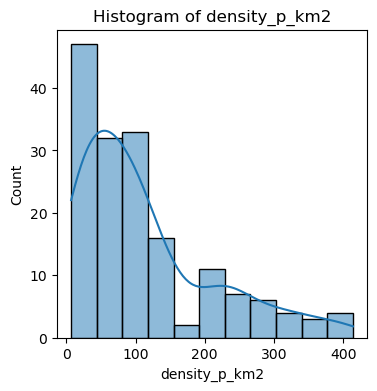

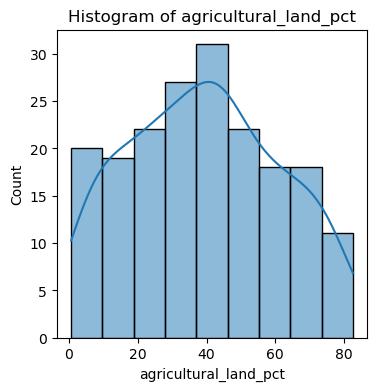

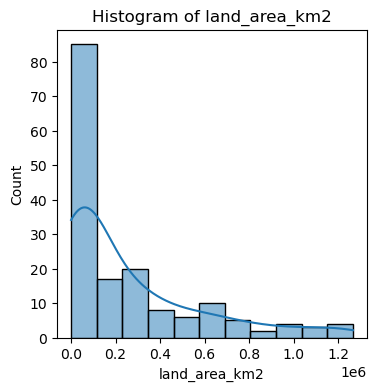

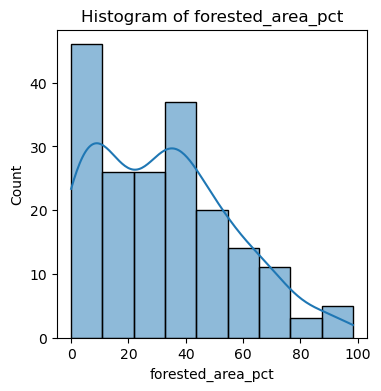

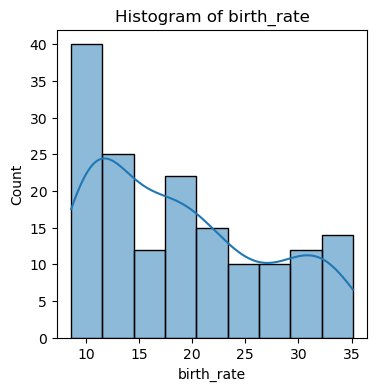

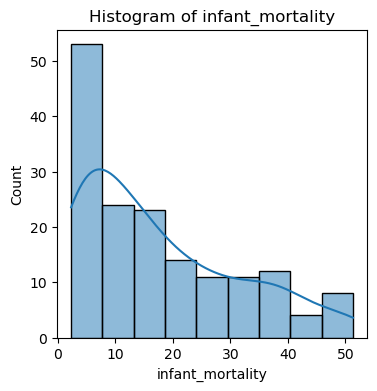

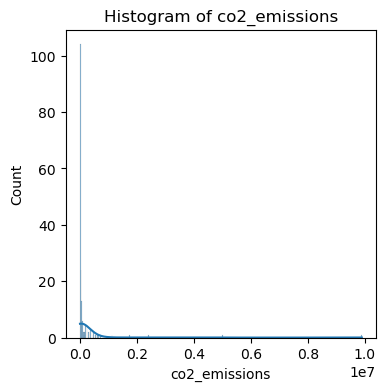

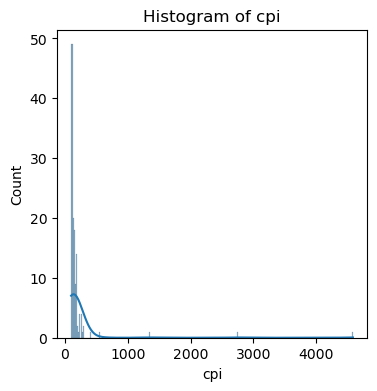

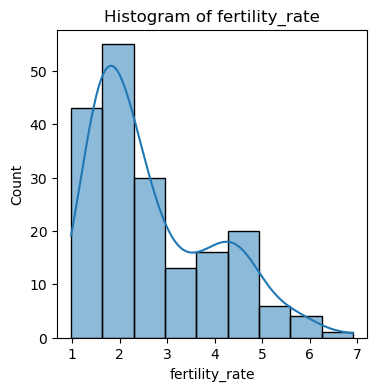

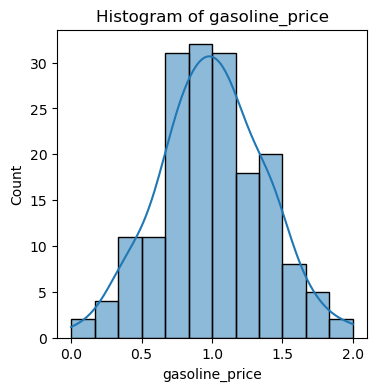

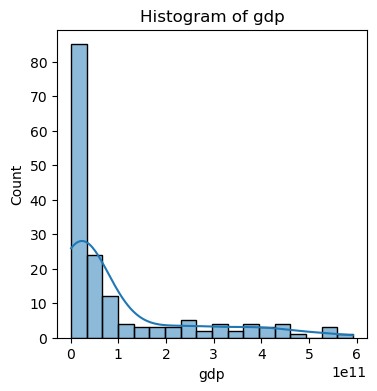

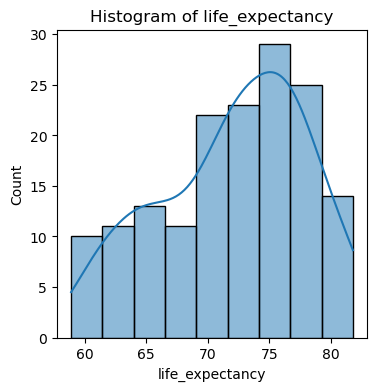

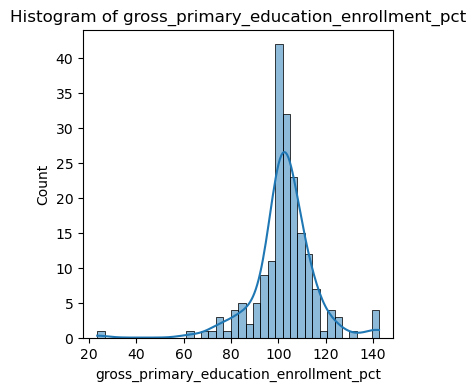

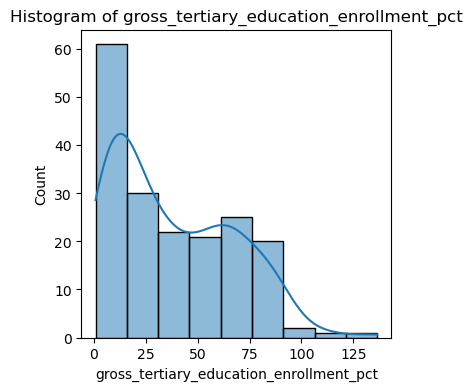

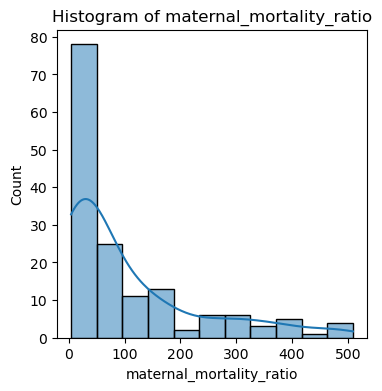

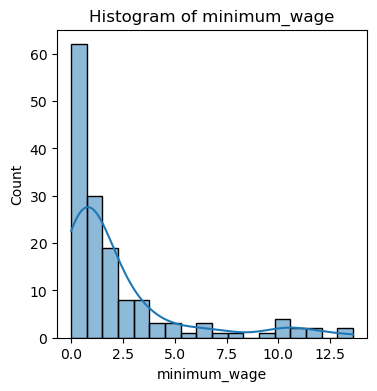

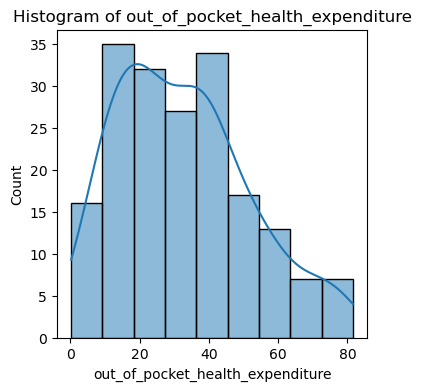

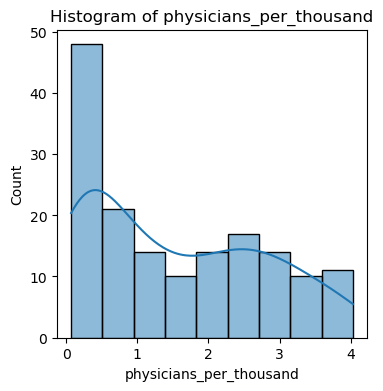

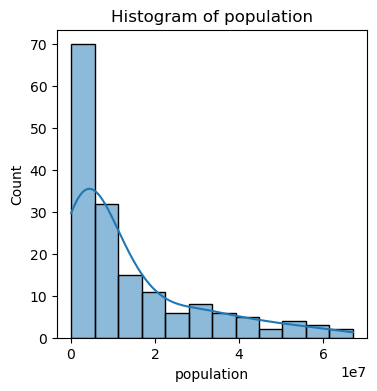

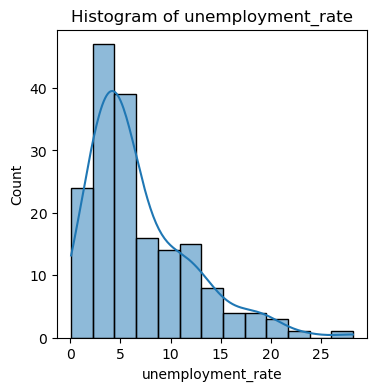

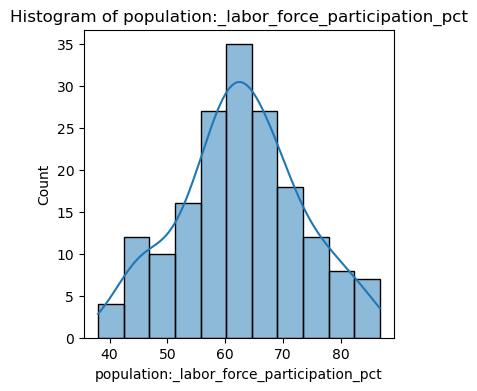

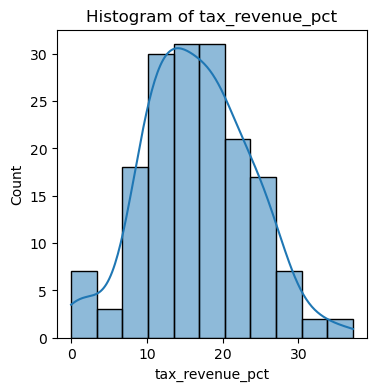

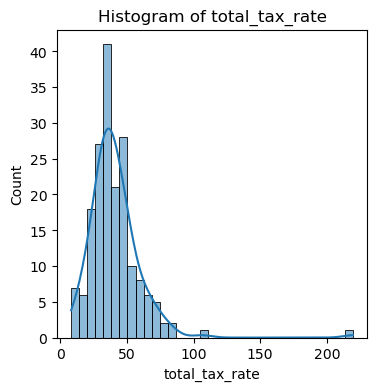

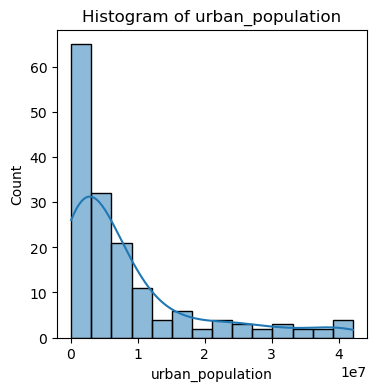

In [5]:
# Basic statistics for numeric columns
print(df.describe())

# Visualize distributions for a few numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

KEY_COLUMNS = [
    'density_p_km2',
    'agricultural_land_pct',
    'land_area_km2',
    'forested_area_pct',
    'birth_rate',                                           # Number of live birth per 1000 people per year
    'infant_mortality',                                     # Number of death infants (under 1 y.o.) per 1000 live births per year
    'co2_emissions',
    'cpi',                                                  # Consumer price index
    'fertility_rate',                                       # Number of children born per woman
    'gasoline_price',
    'gdp',                                                  # Gross Domestic Product
    'life_expectancy',
    'gross_primary_education_enrollment_pct',               # Schools
    'gross_tertiary_education_enrollment_pct',              # University
    'maternal_mortality_ratio',                             # Number of deaths of women from pregnancy-related causes per 100k/y
    'minimum_wage',
    'out_of_pocket_health_expenditure',                     # Percentage of paid not covered by insurance
    'physicians_per_thousand',
    'population',
    'unemployment_rate',
    'population:_labor_force_participation_pct',
    'tax_revenue_pct',
    'total_tax_rate',
    'urban_population'
]

for column in KEY_COLUMNS:
        plt.figure(figsize=[4,4])
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        sns.histplot(df[column], kde=True)                # kde=True adds a smooth density curve
        plt.show()


### Analysis: Distribution of Population Density (`density_p_km2`)
- The histogram shows a right-skewed distribution: most countries have low to moderate population density, with a long tail toward higher densities.
- The highest bar is at the lowest density range, indicating many countries are sparsely populated.
- A few countries have very high density, forming the tail of the distribution (likely small or highly urbanized countries).
- The blue density curve confirms the skewness and overall shape.
- For analysis, median and percentiles are more representative than the mean due to skewness.
- Consider log-transforming this variable for modeling or further analysis.
- Investigate which countries fall into the high-density tail and why.
- Outlier detection is important, as extreme values can affect results.

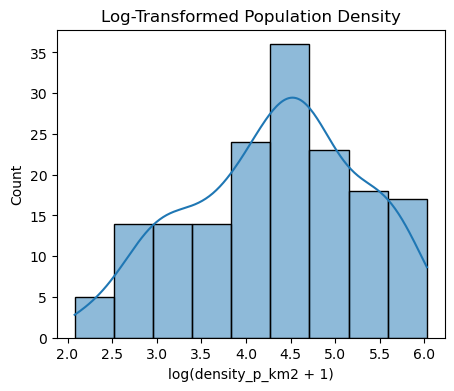

Top 10 countries by population density:
              country  density_p_km2
72              Haiti          414.0
82             Israel          400.0
181            Tuvalu          393.0
16            Belgium          383.0
138       Philippines          368.0
85              Japan          347.0
165         Sri Lanka          341.0
67            Grenada          331.0
107  Marshall Islands          329.0
191           Vietnam          314.0
Population density summary:
count    165.00000
mean     112.09697
std       97.74670
min        7.00000
25%       39.00000
50%       83.00000
75%      147.00000
max      414.00000
Name: density_p_km2, dtype: float64


In [14]:
# Investigate high-density countries and log-transform
import numpy as np

# Log-transform population density for visualization
log_density = np.log1p(df['density_p_km2'])
plt.figure(figsize=[5,4])
plt.title('Log-Transformed Population Density')
plt.xlabel('log(density_p_km2 + 1)')
plt.ylabel('Count')
sns.histplot(log_density, kde=True)
plt.show()

# Top 10 countries by population density
top_density = df[['country', 'density_p_km2']].sort_values('density_p_km2', ascending=False).head(10)
print('Top 10 countries by population density:')
print(top_density)

# Summary statistics
print('Population density summary:')
print(df['density_p_km2'].describe())